In [1]:
# prerequisites
# pip install networkx, matplotlib, xlrd and pandas modules

import matplotlib.pyplot as plt
import pandas as pd
from pert import *  # import pert.py file
from IPython.display import display, HTML

In [2]:
# read project's data saved i ProjectData.xls file
file = "ProjectData.xls"
read_data_file(file)

In [3]:
projects_data = get_project_data()
proj_df = pd.DataFrame.from_dict(projects_data, columns=['Activity', 'Predecessor', 'Duration'], orient="index")
# Show projects data in excel
display(HTML(proj_df.to_html(index=False)))

Activity,Predecessor,Duration
A,[Start],0.5
B,[A],1.0
C,[B],1.5
D,[B],1.4
E,[D],1.2
F,[B],0.8
G,[F],1.0
H,"[C, E, G]",0.4
I,[H],1.4
J,[I],0.5


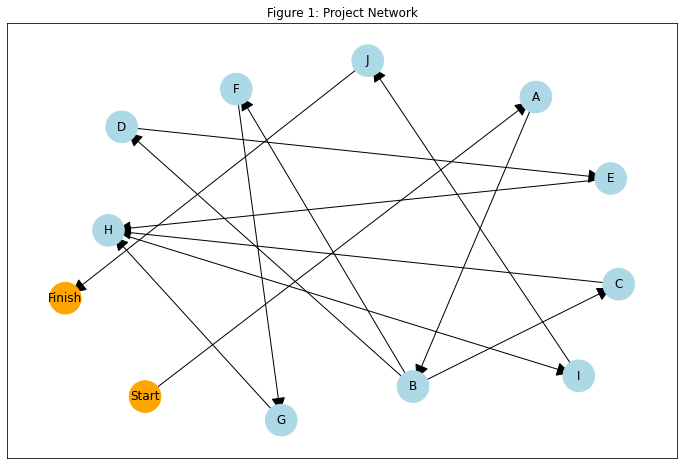

<Figure size 432x288 with 0 Axes>

In [4]:
mydata = defaultdict(list)
mydata['TASKS'] = {k: k for k in tasks.keys()}

# 1. Construct the Project Network
G = nx.DiGraph()
plot_title = "Figure 1: Project Network"
plt.figure(plot_title, figsize=(12,8))  
plt.title(plot_title)
draw_network(G)
plt.savefig("Project_Network.png")
 
plt.show()
# clearing the current plot
plt.clf()

In [5]:
# 2. Perform the forward and backward passes

# Computes the Earliest Start Time and Earliest Finish Time
forward_pass(mydata)
print("Earliest Start Times: ", mydata['ES'])
print("Earliest Finish Times: ", mydata['EF'])

Earliest Start Times:  {'A': 0.0, 'B': 0.5, 'C': 1.5, 'D': 1.5, 'E': 2.9, 'F': 1.5, 'G': 2.3, 'H': 4.1, 'I': 4.5, 'J': 5.9, 'Finish': 6.4}
Earliest Finish Times:  {'A': 0.5, 'B': 1.5, 'C': 3.0, 'D': 2.9, 'E': 4.1, 'F': 2.3, 'G': 3.3, 'H': 4.5, 'I': 5.9, 'J': 6.4, 'Finish': 6.4}


In [6]:
completion_time = get_completion_time(mydata['EF'])

# Set the Finish Time
tasks['Finish'] = completion_time

# Compute the Earliest Start Time and Earliest Finish Time
successors = get_successors(G)
backward_pass(mydata, successors)

print("Latest Start Times: ", mydata['LS'])
print("Latest Finish Times: ", mydata['LF'])

Latest Start Times:  {'Start': 0.0, 'J': 5.9, 'I': 4.5, 'H': 4.1, 'G': 3.1, 'F': 2.3, 'E': 2.9, 'D': 1.5, 'C': 2.6, 'B': 0.5, 'A': 0.0}
Latest Finish Times:  {'Start': 0.0, 'J': 6.4, 'I': 5.9, 'H': 4.5, 'G': 4.1, 'F': 3.1, 'E': 4.1, 'D': 2.9, 'C': 4.1, 'B': 1.5, 'A': 0.5}


In [7]:
# 3. Determine the project completion time
print("Project Completion Time: ", completion_time)

Project Completion Time:  6.4


In [8]:
# 4. Compute Slack and Get Critical Nodes/Edges
compute_slack_values(mydata)
print("Slack values: ", mydata['SLACK'])

Slack values:  {'A': 0.0, 'B': 0.0, 'C': 1.1, 'D': 0.0, 'E': 0.0, 'F': 0.8, 'G': 0.8, 'H': 0.0, 'I': 0.0, 'J': 0.0, 'Start': 0.0, 'Finish': 0.0}


In [9]:
# 5. Determine the Critical Path
critical_path = format_critical_path(mydata['CRITICAL_PATH'])
print("Critical Path: ", critical_path)

Critical Path:  A->B->D->E->H->I->J


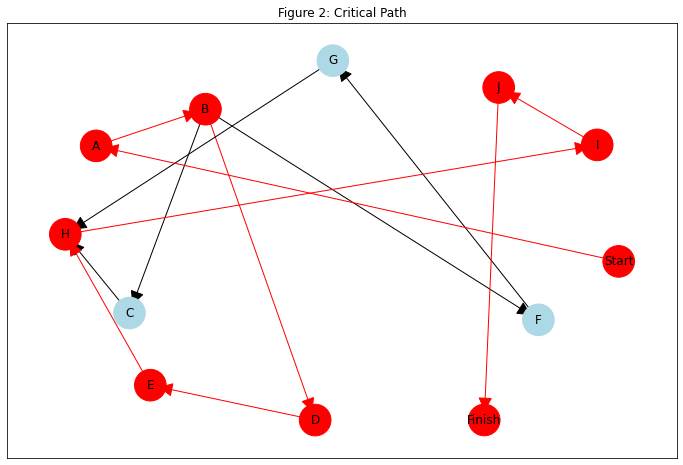

In [10]:
# Plot the Critical Path
G2 = G.copy()
plot_title = "Figure 2: Critical Path"
plt.figure(plot_title, figsize=(12,8))  
plt.title(plot_title)
draw_critical_path(G2, mydata)
plt.savefig("Critical_Path.png")

In [11]:
# Display results
columns = {
    'CODE': ['TASKS', 'ES', 'EF', 'LS', 'LF', 'SLACK', 'CRITICAL'],
    'NAME': ['Activity', 'ES', 'EF', 'LS', 'LF', 'Slack Value', 'Is Critical']
}

data = remove_start_finish_data(mydata)
df = pd.DataFrame(data, columns=columns['CODE'])
display(HTML(df.to_html(index=False)))

other_data = {
    "Project Completion Time:" : [completion_time],
    "Critical Path:" : [critical_path]
}
df2 = pd.DataFrame.from_dict(other_data, orient="index")
display(HTML(df2.to_html(header=False)))

TASKS,ES,EF,LS,LF,SLACK,CRITICAL
A,0.0,0.5,0.0,0.5,0.0,YES
B,0.5,1.5,0.5,1.5,0.0,YES
C,1.5,3.0,2.6,4.1,1.1,NO
D,1.5,2.9,1.5,2.9,0.0,YES
E,2.9,4.1,2.9,4.1,0.0,YES
F,1.5,2.3,2.3,3.1,0.8,NO
G,2.3,3.3,3.1,4.1,0.8,NO
H,4.1,4.5,4.1,4.5,0.0,YES
I,4.5,5.9,4.5,5.9,0.0,YES
J,5.9,6.4,5.9,6.4,0.0,YES


Project Completion Time:,6.4
Critical Path:,A->B->D->E->H->I->J
